<a href="https://colab.research.google.com/github/Alona7777/Data_Science/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_18_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

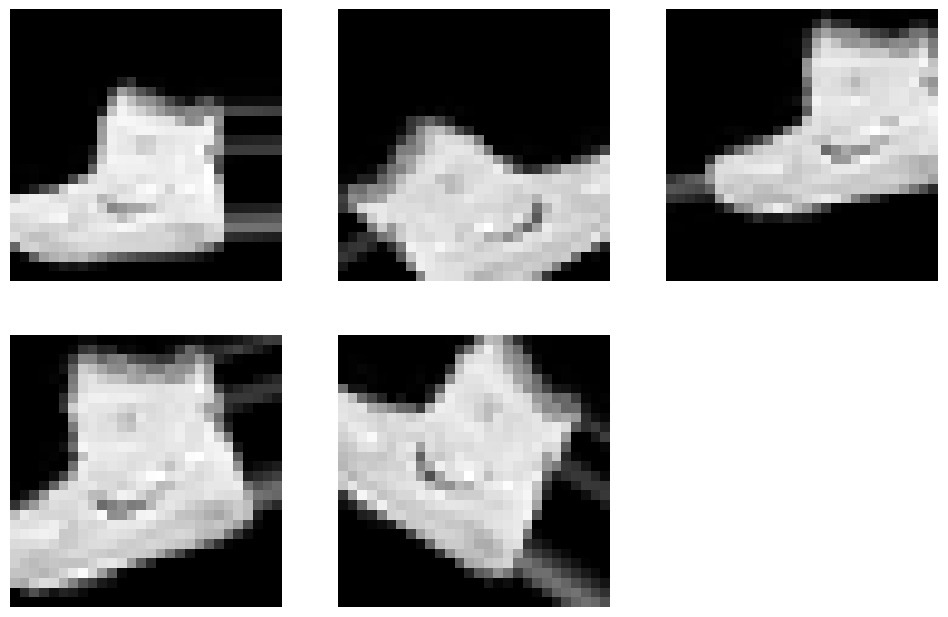

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


# Припустимо, у нас є одне зображення для демонстрації
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0

# Виберемо одне зображення з набору даних
sample_image = x_train[0].reshape((28, 28))

# Створення генератора даних
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Розширення даних з одного зображення
sample_image = sample_image.reshape((1, 28, 28, 1))  # Перетворення до 4D (batch, height, width, channels)
datagen.fit(sample_image)

# Генерація кількох варіацій зображення
plt.figure(figsize=(12, 12))
for i in range(5):
    augmented_image = datagen.flow(sample_image, batch_size=1)[0]
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image[0].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


Аугментація зображень - це процес штучного збільшення обсягу даних для навчання шляхом випадкових трансформацій зображень. Це корисний підхід в глибинному навчанні, особливо коли в наявності обмежена кількість навчальних даних.
Трансформації допомагають моделі навчатися узагальнювати краще, тобто розпізнавати об'єкти на зображеннях, навіть якщо вони зустрічаються в навчальному наборі у різних позиціях, розмірах чи кутах. Це підвищує стійкість моделі і зменшує перенавчання.
Створюючи генератор даних для аугментації зображень, ми забезпечуємо кращу ефективність навчання нашої моделі машинного навчання чи нейронної мережі.

4422102/4422102 [==============================] - 1s 0us/step


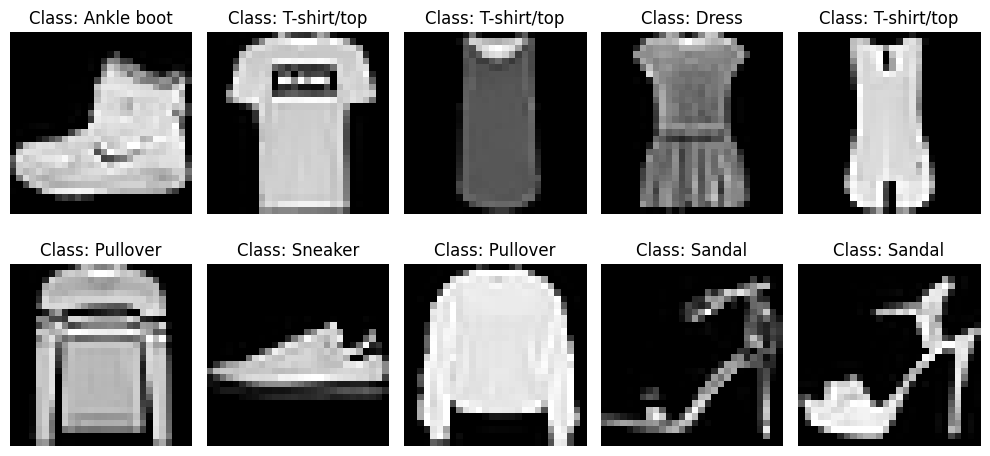

Epoch 1/20
468/468 [==============================] - 150s 308ms/step - loss: 1.2615 - accuracy: 0.5674 - val_loss: 1.4554 - val_accuracy: 0.4409 - lr: 0.0010
Epoch 2/20
468/468 [==============================] - 145s 311ms/step - loss: 0.8425 - accuracy: 0.6853 - val_loss: 0.6393 - val_accuracy: 0.7630 - lr: 0.0010
Epoch 3/20
468/468 [==============================] - 145s 310ms/step - loss: 0.7447 - accuracy: 0.7235 - val_loss: 0.6022 - val_accuracy: 0.7865 - lr: 0.0010
Epoch 4/20
468/468 [==============================] - 151s 323ms/step - loss: 0.6903 - accuracy: 0.7462 - val_loss: 0.6013 - val_accuracy: 0.7752 - lr: 0.0010
Epoch 5/20
468/468 [==============================] - 143s 305ms/step - loss: 0.6475 - accuracy: 0.7622 - val_loss: 0.6564 - val_accuracy: 0.7520 - lr: 0.0010
Epoch 6/20
468/468 [==============================] - 139s 298ms/step - loss: 0.6284 - accuracy: 0.7692 - val_loss: 0.5288 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 7/20
468/468 [==========================

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Завантаження та попередня обробка даних Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Додавання каналу кольору для відповідності input_shape моделі
#-1 - цей параметр означає, що розмір першого виміру (кількість зображень) визначається автоматично.
#1 - кількість каналів = 1, тому що зображення чорно-білі.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#Іншій спосіб доодати канал:
#x_train = np.expand_dims(x_train, axis=-1)
#x_test = np.expand_dims(x_test, axis=-1)

# Назви класів у датасеті Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Виведення перших 10 зображень з датасету Fashion MNIST разом з назвами класів
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class: {class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Масштабування пікселів до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворення міток на категоріальні дані
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Створення генератора даних для аугментації зображень
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Створення моделі
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

batch_size = 128

# Визначення callback-ів
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Генератор для тренувальних даних
train_generator = datagen.flow(x_train, y_train_cat, batch_size=batch_size)

# Навчання моделі
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=20,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Збереження вагів моделі після тренування
model.save_weights('fashion_mnist_model.h5')


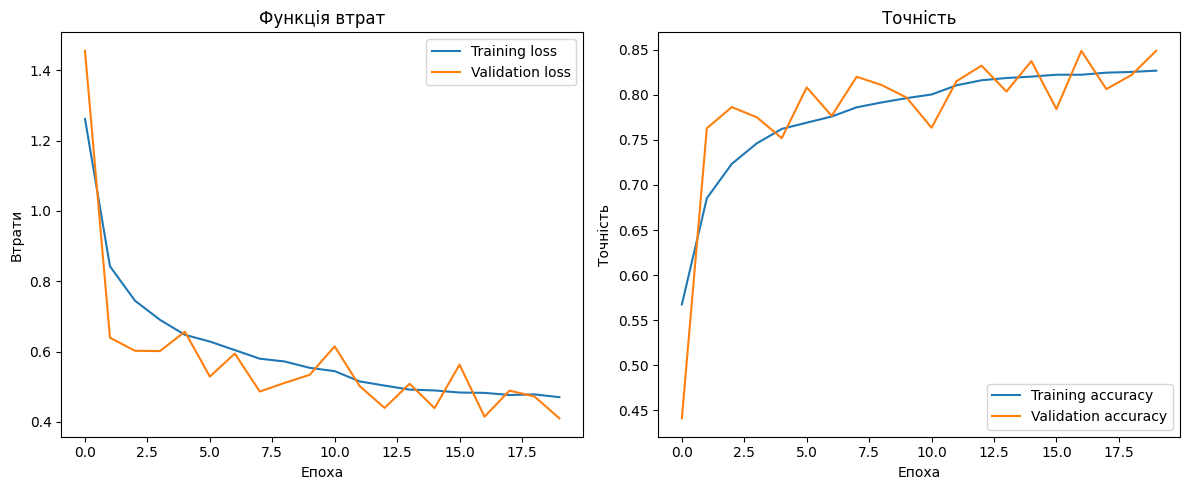

In [ ]:
# Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 5))

# Графік функції втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Функція втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

# Завантаження та попередня обробка даних Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Додавання каналу кольору для відповідності input_shape моделі
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# Масштабування пікселів до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворення міток на категоріальні дані
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Створення моделі
model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Визначення callback-ів
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Навчання моделі
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=50,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Збереження вагів моделі після тренування
model.save_weights('fashion_mnist_model.h5')


Epoch 1/50
469/469 [==============================] - 8s 10ms/step - loss: 0.6071 - accuracy: 0.7893 - val_loss: 0.8458 - val_accuracy: 0.6951 - lr: 0.0010
Epoch 2/50
469/469 [==============================] - 4s 10ms/step - loss: 0.3748 - accuracy: 0.8628 - val_loss: 0.3039 - val_accuracy: 0.8864 - lr: 0.0010
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.3229 - accuracy: 0.8823 - val_loss: 0.3420 - val_accuracy: 0.8724 - lr: 0.0010
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2944 - accuracy: 0.8909 - val_loss: 0.2565 - val_accuracy: 0.9030 - lr: 0.0010
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2734 - accuracy: 0.8985 - val_loss: 0.2687 - val_accuracy: 0.9001 - lr: 0.0010
Epoch 6/50
469/469 [==============================] - 4s 10ms/step - loss: 0.2618 - accuracy: 0.9027 - val_loss: 0.2581 - val_accuracy: 0.9005 - lr: 0.0010
Epoch 7/50
469/469 [==============================] - 5s 10ms/st